# Agricultural growth and emissions

- Could we find and support a correlation between greenhouse gas emissions and agricultural growth? Could we also assess the influence of the type of culture on the emissions?
- Based on this, is it possible to make predictions of greenhouse gas emissions by extrapolating the agricultural growth and land usage?
- Is it possible to rank some patterns of land usage with social and environmental factors such as employment, life satisfaction (if data are presents), income inequalities (if data are presents), emissions and finally soil quality and sustainability?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import statsmodels
import folium

# Custom imports
from ipywidgets import IntProgress
from IPython.display import display
import time
from multiprocessing import Pool, Lock
import os
import json
import seaborn as sns

In [2]:
dataLands = pd.read_csv("./data/fao_data_land_data.csv")
dataLands

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,11,Area,2007.0,1000 Ha,38661.0,Q,agricultural_area
1,Afghanistan,11,Area,2006.0,1000 Ha,38659.0,Fm,agricultural_area
2,Afghanistan,11,Area,2005.0,1000 Ha,38515.0,Fm,agricultural_area
3,Afghanistan,11,Area,2004.0,1000 Ha,38064.0,Fm,agricultural_area
4,Afghanistan,11,Area,2003.0,1000 Ha,38899.0,Fm,agricultural_area
...,...,...,...,...,...,...,...,...
104779,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104780,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104781,Q,Official data reported on FAO Questionnaires f...,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104782,Fm,Manual Estimation,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation


In [3]:
dataLands = dataLands.dropna(subset=["element"])

In [4]:
def cond_countries(dataLands):
    countries = ["Asia +","Europe +", "Americas +", "Oceania +", "Africa +"]
    truthTable = (dataLands["country_or_area"] == countries[0])
    print(truthTable)
    for c in countries:
        truthTable = (dataLands["country_or_area"] == c) | truthTable
    return truthTable

dataLandsContinent = dataLands.where(dataLands["category"] == "agricultural_area")\
                                .where(cond_countries(dataLands))\
                                .dropna(subset=["country_or_area"])\
                                .sort_values("value",ascending=False)

0         False
1         False
2         False
3         False
4         False
          ...  
104771    False
104772    False
104773    False
104774    False
104775    False
Name: country_or_area, Length: 104659, dtype: bool


/home/jeremy/miniconda3/envs/ada-2019/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


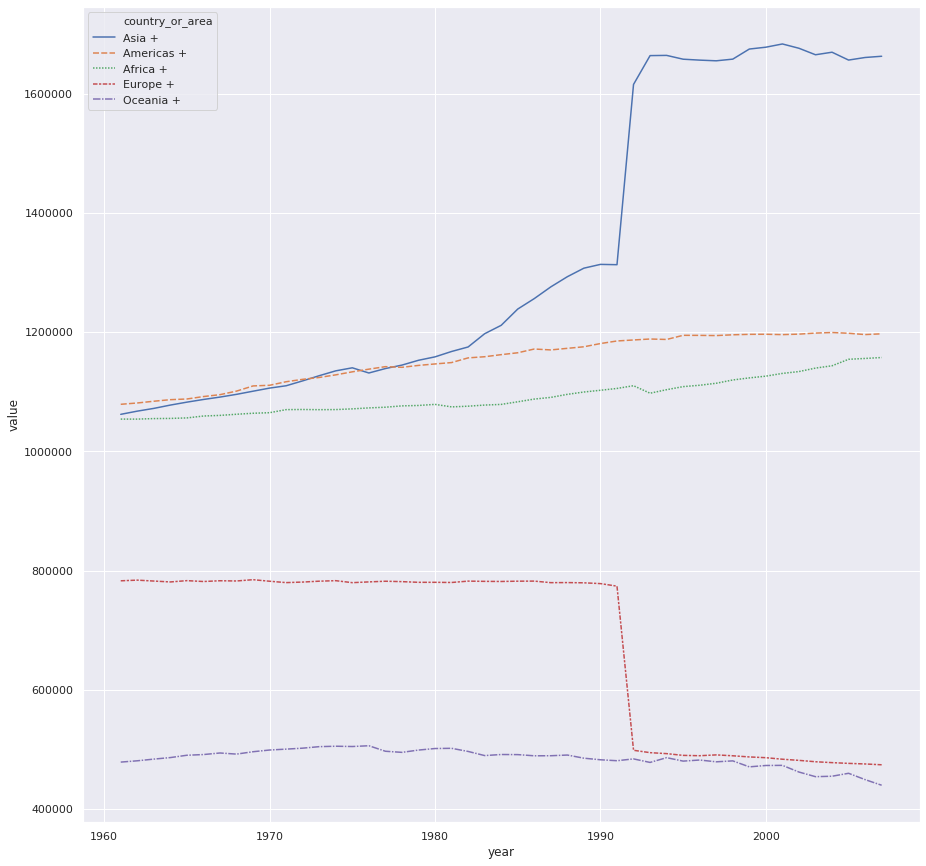

In [5]:
sns.set(style="darkgrid")

fg = plt.figure(figsize=(15,15))
axes = fg.add_subplot()
# Plot the responses for different events and regions
sns.lineplot(x="year", y="value", style="country_or_area", data=dataLandsContinent, hue="country_or_area", ax=axes)

fg.show()